AinShams University

Faculty of Engineering

4th year Mechtronics Dept.

#Image Processing 1 - Instagram Filters

-------------------------------------------------------------------------------

#محمد خالد محمد عبدالجواد 

muhammedkhaled1110@gmail.com

1301115

#محمد حسن السعيد البنان

Elbannan.m@yahoo.com

14X0108

We'll implement 5 different instagram filters to an image using opencv, numpy, and matplotlib libraries. 

Firslt, we will define several functions that would help us in implementing our main function 
insta_like()

we will show the histogram of an image when we can conclude some info from the image without seeing it just from the histogram

we will use gamma correction that helps us to make an image darker or lighter


In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
'''note that: 
in opencv images are read as BGR not RGB, on the contrary, images in 
matplotlib library are read as RGB so we need to convert from BGR to RGB to be able to 
show images using matplotlib''' 
original = cv2.imread('edrab.jpg', cv2.IMREAD_UNCHANGED)
original_img = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(original_img)
plt.show()


error: C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


We are going to make a histogram function that takes an image and outputs the histogram on image (going to be useful sometimes to have more knowledge in contrast and brightness.

In [2]:
def histogram(image):
    color = ('b', 'g', 'r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([image], [i] , None, [256], [0,256]) 
        plt.plot(hist, color = col)
        plt.xlim([0,256])
    plt.show()

let's test our histogram function on our original image  

In [3]:
histogram(original_img)

NameError: name 'original_img' is not defined

As it shown here in the histogram of our original image, we can conclude that our image has much more shadows or dark areas than highlights or bright areas, especially in green and red channels

Gamma correction function

gamma <1 darker

gamma >1 lighter

O = I^1/G when O: output image

I: input image

G: gamma value

So to apply gamma correction we need first to scale the color range from [0,255] to [0,1.0] then apply the equation above then return to the original scale of the colors [0,255]

In [13]:
def adjust_gamma(image, gamma = 1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
	return cv2.LUT(image, table)

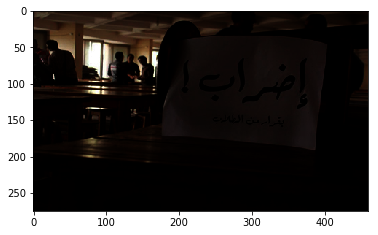

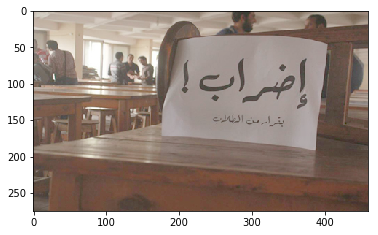

In [216]:
#Just to test gamma correction
#can be used to manipulate the image to apply a certain filter
gamma_darker = adjust_gamma(original_img, 0.3)
plt.imshow(gamma_darker)
plt.show()
gamma_lighter = adjust_gamma(original_img, 2)
plt.imshow(gamma_lighter)
plt.show()

blurring function

In [16]:
def blur(image, matrix):
    blurred_image = cv2.blur(image, matrix)
    return blurred_image

sharpening function

In [205]:
def sharpen(image):
       kernal = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
       sharpened_image = cv2.filter2D(image, -1, kernal)
       return sharpened_image

blurring our original image using blur() function

<function matplotlib.pyplot.show>

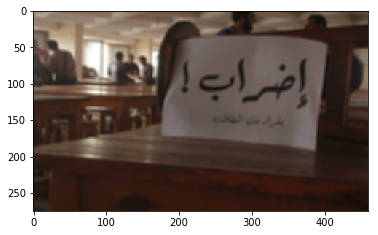

In [208]:
blurred = blur(original_img, (5,5))  #just for testing the blur() function
plt.imshow(blurred)
plt.show    

sharpening our original image using sharpen() function

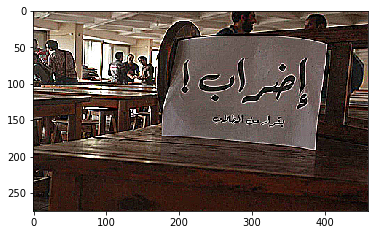

In [215]:
sharpened = sharpen(original_img) #just for testing the sharpen() function
plt.imshow(sharpened)
plt.show()

Now we need to split our image into 3 differenet images each one has only 1 channel, because an image consists of 3 channels (RGB)

Note that openCV reads images in BGR format not RGB, but we already took into account that point above

split_image(): is a function used to split any image into its 3 channels blue, green, red to process each one on its own


In [6]:
def split_image(image):
    red = image[:, :, 2]
    green = image[:, :, 1]
    blue = image[:, :, 0]
    return red, green, blue    



After spliting the image and manipulate each channel on its own we need to get it back again by merging the 3 channels of the image

merge_image(): is a function used to merge the 3 channels after finishing whatever processing you need on them.


In [10]:
def merge_image(red_channel, green_channel, blue_channel):
    image_merged = cv2.merge((red_channel, green_channel, blue_channel))
    return image_merged

Now, we have 6 functions: sharpen(), blur(), split_image(), merge_image(), histogram(), and adjust_gamma() these functions will be used in the function we're gonna define later on, which called insta_like(parameter1, parameter2) where parameter1 is the image we are filtering and parameter2 is the instagram filter we want to apply.

a helper function: darkness_brightness() is a function that takes 3 inputs

1- input image

2- operation (add or subtract)

3- value of the matrix elements

amd outputs a new image brightened or darkened

In [8]:
def darkness_brightness(image, operation, x):
    matrix = np.ones(image.shape, dtype="uint8") * x
    if operation == "add":
        brighter = cv2.add(image, matrix)
        return brighter
    elif operation == "sub":
        darker= cv2.subtract(image, matrix)
        return darker
    else: 
        print("Enter add or sub only!")

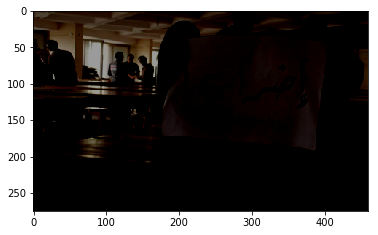

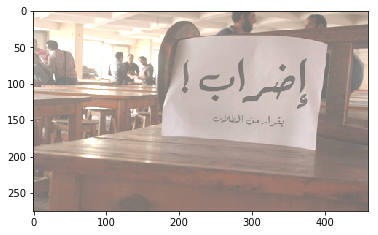

In [222]:
x = darkness_brightness(original_img, "sub", 100)
y = darkness_brightness(original_img, "add", 100)
plt.imshow(x)
plt.show()
plt.imshow(y)
plt.show()

insta_like() is a function with 2 input parameters:

1- an image

2- a filter to apply on the image

output will be a filtered image of the original image

In [4]:
def insta_like(image, chosen_filter):
    if chosen_filter == "lily":
        blurred = blur(original_img, (5,5))
        r1, g1, b1 = split_image(blurred)
        g_adjusted = darkness_brightness(g1, "add", 0)
        b_adjusted = darkness_brightness(b1, "sub", 255)
        lily = merge_image(r1, g_adjusted, b_adjusted)
        lily1 = darkness_brightness(lily, "add", 90)
        plt.imshow(lily1)
        plt.show()
        
       
    elif chosen_filter == "toaster":
        r2, g2, b2 = split_image(original_img)
        r_adjusted1 = darkness_brightness(r2, "add", 55)
        g_adjusted1 = darkness_brightness(g2, "add" , 40)
        b_adjusted1 = darkness_brightness(b2, "sub", 10)
        toaster = merge_image(r_adjusted1, g_adjusted1, b_adjusted1)
        toaster_brighter = darkness_brightness(toaster, "add", 25)
        plt.imshow(toaster_brighter)
        plt.show()
        
        
    elif chosen_filter == "nashville":
        blurred = blur(original_img, (1,1))
        rw, gw, bw = split_image(blurred)
        rw_adjusted = darkness_brightness(rw, "add" , 30)
        gw_adjusted = darkness_brightness(gw, "add" , 40)
        bw_adjusted = darkness_brightness(bw, "add" , 0)
        merged_nash = merge_image(rw_adjusted, gw_adjusted, bw_adjusted)
        lighter_nash = adjust_gamma(merged_nash, 2.8)
        plt.imshow(lighter_nash)
        plt.show()
        
    elif chosen_filter == "lord kelvin":
        r3, g3, b3 = split_image(original_img)
        r3_adjusted = darkness_brightness(r3, "add", 100)
        g3_adjusted = darkness_brightness(g3, "add", 11) 
        b3_adjusted = darkness_brightness(b3, "sub" , 67)
        kelvin = merge_image(r3_adjusted, g3_adjusted, b3_adjusted)
        plt.imshow(kelvin)
        plt.show()
        
        
    elif chosen_filter == "hefe":
        
        r4, g4, b4 = split_image(original_img)
        b4_adjusted = adjust_gamma(b4, 0.4)
        r4_adjusted = adjust_gamma(r4, 3)
        g4_adjusted =  adjust_gamma(g4, 1.3)
        hefe = merge_image(r4_adjusted, g4_adjusted, b4_adjusted)
        hefe_lighter = adjust_gamma(hefe, 2)
        plt.imshow(hefe_lighter)
        plt.show()
        
        
    else: 
        print("ERROR!! Enter 1 of the 5 filters in our app!")
    
    

#lord kelvin filter 

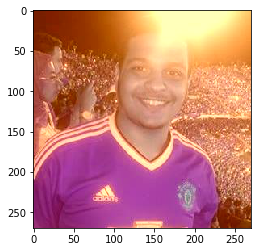

In [11]:
 insta_like(original_img, "lord kelvin")


#hefe filter

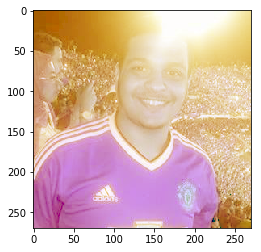

In [14]:
insta_like(original_img, "hefe")

#lily filter

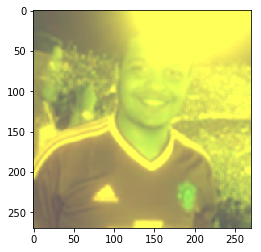

In [17]:
insta_like(original_img, "lily")

#nashville Filter

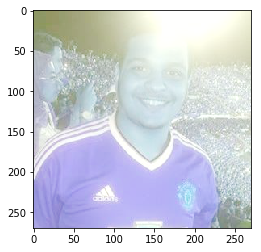

In [18]:
insta_like(original_img, "nashville")

#toaster filter

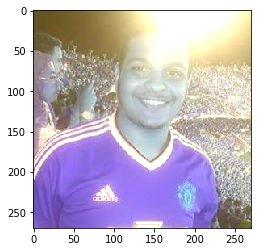

In [19]:
insta_like(original_img, "toaster")